# 3D Partially coherent ODT processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fft2, ifft2, fftn, ifftn, fftshift, ifftshift

import pickle
import waveorder as wo
import waveorder.DPC as DPC


%matplotlib inline
plt.style.use(['dark_background']) # Plotting option for dark background


### Load data

In [2]:
# Load simulations

f = open('simulation_data_PODT_SEAGLE.pckl', 'rb')
I_meas, lambda_illu, n_media, ps, psz, NA_obj, NA_illu = pickle.load(f)
f.close()

N, M, L = I_meas.shape


### Refractive index reconstruction

In [3]:
z_defocus = (np.r_[:L]-L//2)*psz
chi = 0.1*2*np.pi

setup = wo.waveorder_microscopy((N,M), lambda_illu, ps, NA_obj, NA_illu, z_defocus, chi, \
                                n_media = n_media, phase_deconv='3D', use_gpu=True, gpu_id=2)


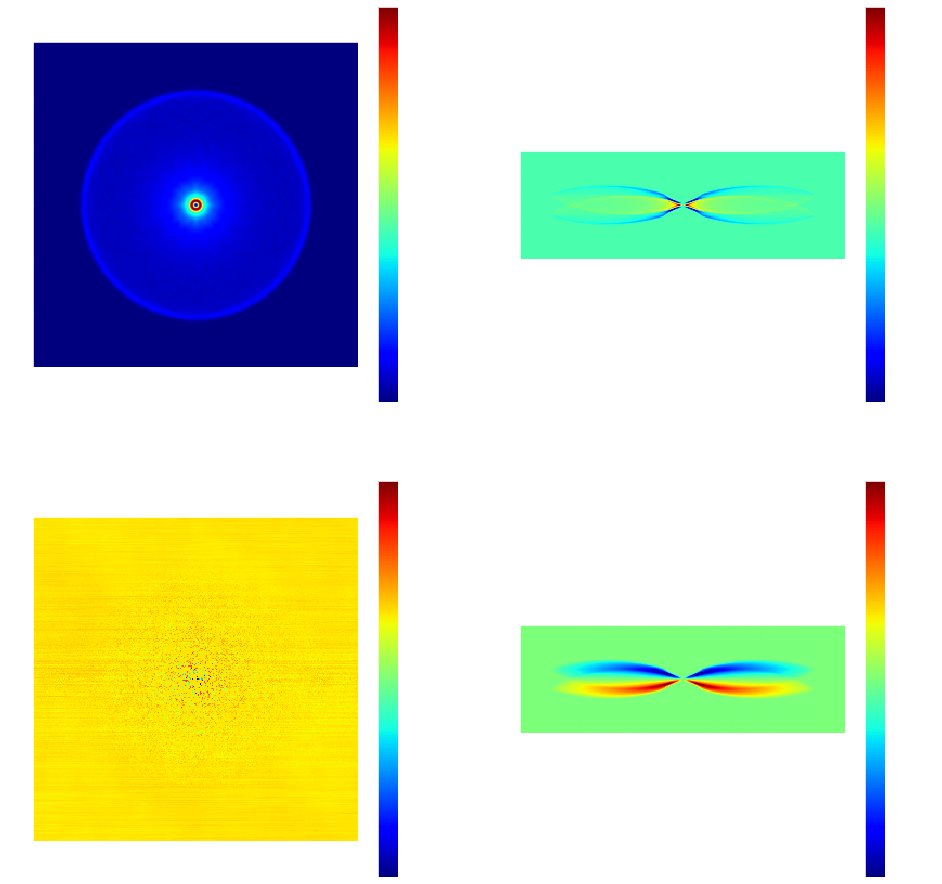

In [4]:
H_re_vis = fftshift(setup.H_re)

wo.plot_multicolumn([np.real(H_re_vis)[:,:,L//2], np.transpose(np.real(H_re_vis)[N//2,:,:]), \
                     np.imag(H_re_vis)[:,:,L//2], np.transpose(np.imag(H_re_vis)[N//2,:,:])], \
                    num_col=2, size=8, set_title=True, \
                    titles=['$xy$-slice of Re{$H_{re}$} at $u_z=0$', '$xz$-slice of Re{$H_{re}$} at $u_y=0$', \
                            '$xy$-slice of Im{$H_{re}$} at $u_z=0$', '$xz$-slice of Im{$H_{re}$} at $u_y=0$'], colormap='jet')

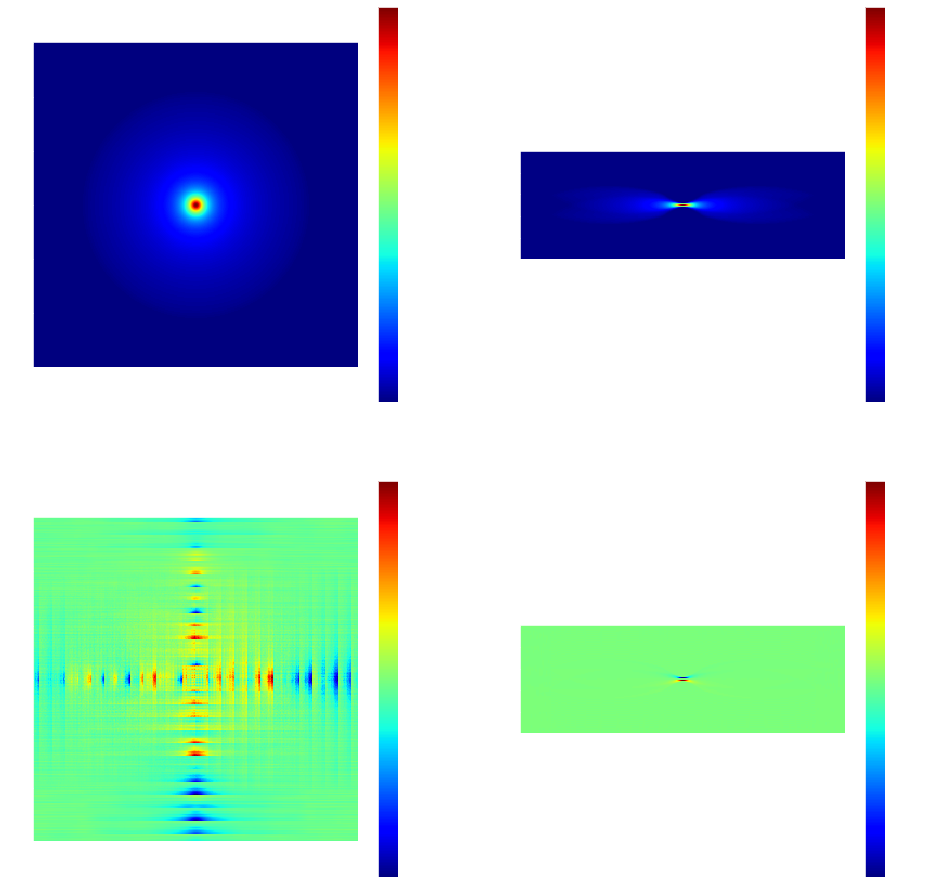

In [5]:
H_im_vis = fftshift(setup.H_im)

wo.plot_multicolumn([np.real(H_im_vis)[:,:,L//2], np.transpose(np.real(H_im_vis)[N//2,:,:]), \
                     np.imag(H_im_vis)[:,:,L//2], np.transpose(np.imag(H_im_vis)[N//2,:,:])], \
                    num_col=2, size=8, set_title=True, \
                    titles=['$xy$-slice of Re{$H_{im}$} at $u_z=0$', '$xz$-slice of Re{$H_{im}$} at $u_y=0$', \
                            '$xy$-slice of Im{$H_{im}$} at $u_z=0$', '$xz$-slice of Im{$H_{im}$} at $u_y=0$'], colormap='jet')

In [6]:
wo.image_stack_viewer(np.transpose(I_meas,(0,1,2)))

interactive(children=(IntSlider(value=0, description='stack_idx', max=299), Output()), _dom_classes=('widget-i…

<function waveorder.visual.image_stack_viewer.<locals>.interact_plot_3D(stack_idx)>

In [7]:
f_real = setup.Phase_recon_3D(I_meas, absorption_ratio=0.0, method='Tikhonov', reg_re = 1e-5)

In [8]:
wo.image_stack_viewer(np.transpose(f_real,(0,1,2)))

interactive(children=(IntSlider(value=0, description='stack_idx', max=299), Output()), _dom_classes=('widget-i…

<function waveorder.visual.image_stack_viewer.<locals>.interact_plot_3D(stack_idx)>

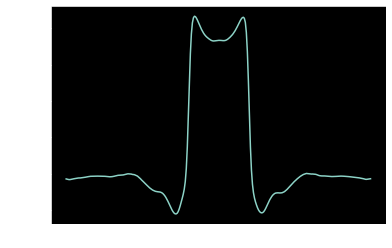

In [9]:
plt.plot(f_real[N//2,:,L//2])

In [10]:
n_square = n_media**2 *(1 + f_real/psz*4*np.pi/lambda_illu*n_media / (2*np.pi/lambda_illu)**2)
n_re = ((np.abs(n_square) + np.real(n_square))/2)**(0.5)
n_im = ((np.abs(n_square) - np.real(n_square))/2)**(0.5)

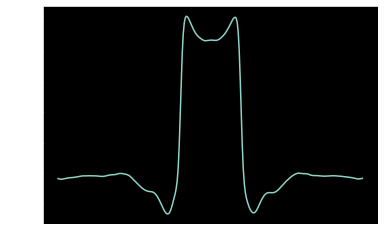

In [11]:
plt.plot(n_re[N//2,:,L//2])